In [30]:
import csv
import math
import operator
import numpy as np
import collections
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

#Open csv File
file_kalman = open('error_KalmanRight.csv','r')

#Read csv File
kalman_list = list(csv.reader(file_kalman, delimiter=','))

# Vector pie izquierdo y derecho para resultados
rows_kalman = len(kalman_list)
cols_kalman = 6
foot_kalman   = np.zeros((rows_kalman, 2))
foot_measured = np.zeros((rows_kalman, 2))
error  = np.zeros((rows_kalman, 1))
frames = np.zeros((rows_kalman, 1))

for i in range(1,rows_kalman):
    foot_kalman[i][0]   = int(kalman_list[i][1])
    foot_kalman[i][1]   = int(kalman_list[i][2])
    foot_measured[i][0] = int(kalman_list[i][3])
    foot_measured[i][1] = int(kalman_list[i][4])
    dx = foot_kalman[i][0] - foot_measured[i][0]
    dy = foot_kalman[i][1] - foot_measured[i][1]
    
    error[i] = np.sqrt(dx*dx + dy*dy)
    
    str_frame = kalman_list[i][0]
    frames[i] = int(str_frame.translate(None, '.jpg'))

<IPython.core.display.Javascript object>


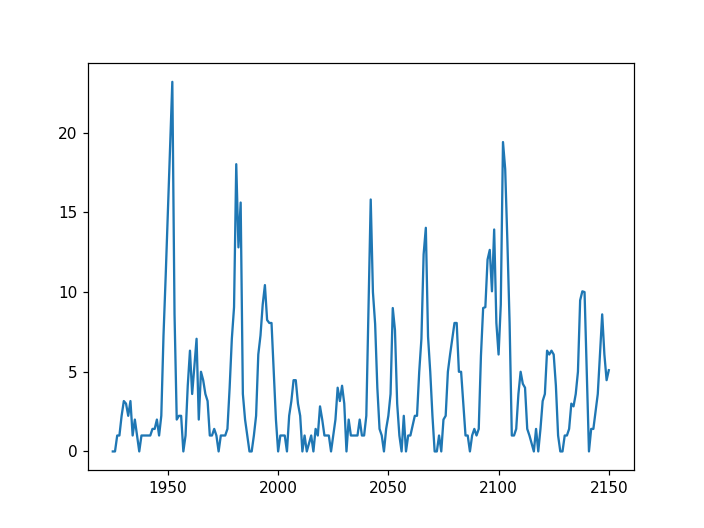

In [31]:
fnl_error = np.power(error[2:], 1)
fnl_error_ac    = fnl_error - np.average(fnl_error) 
error_ac = error[2:] - np.average(error[2:])
fig1=plt.figure(1)
ax = fig1.add_subplot(1,1,1)
ax.figure.canvas.draw()
ax.plot(frames[2:], fnl_error)
# ax.plot(frames[2:], np.ones((rows_kalman, 1)))
plt.ion()     # turns on interactive mode
plt.show() 

# print "doing something else now"
# raw_input('Press Enter to continue...')
    